This notebook analyses the distribution of the recoreded emotions in the dataset.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [12]:
data_train_path = 'C:/Users/manon/Desktop/Projet_2 _ML/code/datas/Split_48_neutre/Combined_All_Train_80.csv'
data_test_path = 'C:/Users/manon/Desktop/Projet_2 _ML/code/datas/Split_48_neutre/Combined_All_Test_80.csv'

# Load the data and separate the brain and emotions data. If working with the 400 brain regions, change 48 with 400
tx_train = pd.read_csv(data_train_path,sep=",",squeeze=True)
X_train=tx_train.iloc[:, :48]
ytr = pd.read_csv(data_train_path,sep=",",usecols=[48],squeeze=True)

tx_test = pd.read_csv(data_test_path,sep=",",squeeze=True)
X_test=tx_test.iloc[:, :48]
yte = pd.read_csv(data_test_path,sep=",",usecols=[48],squeeze=True)

def add_column_names(data):
    liste=[]
    for i in range(48):
        liste.append(str(i+1))
    data.columns=liste
    return data,liste

# add identifiers to the brain data (i.e. number of the brain regions)
X_train,liste = add_column_names(X_train)
X_test,liste = add_column_names(X_test)

# change the format of the emotion data from double to int
ytr = ytr.astype(np.int64)
yte = yte.astype(np.int64)

#concatenate the training and testing emotion datasets
ytr2 = np.expand_dims(ytr, axis=1)
ytr2 = pd.DataFrame(ytr2, columns = ['Emotions'])
yte2 = np.expand_dims(yte, axis=1)
yte2 = pd.DataFrame(yte2, columns = ['Emotions'])
y=pd.concat([yte2,ytr2])

## Count Plot of the Emotions in the dataset

Put emotions in alphabetical order:

In [13]:
dict = pd.DataFrame({0:'Anger',1:'Sad',2:'Guilt',3:'Shame',4:'Disgust',5:'Anxiety',6:'Fear',7:'Surprise',8:'Contempt',9:'Satisfaction',
            10:'WarmHeart.',11:'Happiness',12:'Love',13:'Neutral'}, index=[0])
y=y.replace({"Emotions": dict})

Plot:

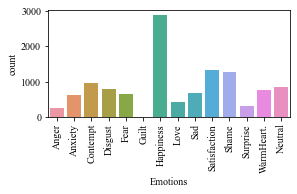

In [14]:
def cm_to_inch(value):
    return value/2.54

hfont = {'fontname':'Times New Roman'}
sns.set_style({'fontname':'Times New Roman'})

fig = plt.figure(figsize=(cm_to_inch(11),cm_to_inch(5)))
plt.xticks(rotation=90)
plt.rcParams["font.family"] = "Times New Roman"
sns.countplot(x='Emotions',data=y, order=['Anger','Anxiety','Contempt','Disgust','Fear','Guilt','Happiness',
                                         'Love','Sad','Satisfaction','Shame','Surprise','WarmHeart.','Neutral']
              ,orient='v')
fig.savefig('C:/Users/manon/Desktop/Projet_2 _ML/figures/Emotions.eps', format='eps',bbox_inches = 'tight')

## Corresponding percentages

In [18]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder
y2= np.squeeze(y)
print(y2.shape)
counter = Counter(y2)
for k,v in counter.items():
    per = v / len(y2) * 100
    print('%s, n=%d (%.3f%%)' % (k, v, per))

(11841,)
Satisfaction, n=1339 (11.308%)
Shame, n=1275 (10.768%)
Surprise, n=306 (2.584%)
Disgust, n=804 (6.790%)
Neutral, n=853 (7.204%)
Anger, n=255 (2.154%)
Love, n=416 (3.513%)
WarmHeart., n=776 (6.554%)
Fear, n=655 (5.532%)
Contempt, n=972 (8.209%)
Happiness, n=2889 (24.398%)
Sad, n=672 (5.675%)
Anxiety, n=629 (5.312%)
